# 1. Reading and Understanding the data

#### Suppressing the Warnings

In [1]:
import warnings
warnings.filterwarnings("ignore")

#### Importing Numpy, Pandas, matplotlib and seaborn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading the .csv data and understanding the same

In [3]:
boombike = pd.read_csv("day.csv")
boombike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
boombike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
boombike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


By looking into the description and the info of the given data, we can understand that none of the columns have missing values. 

# 2. Visualising the data to check the correlation between variables

### Visualising the continuous variables to check if there is any direct association with the target variable

#### Making a pairplot to visualize the numeric variables

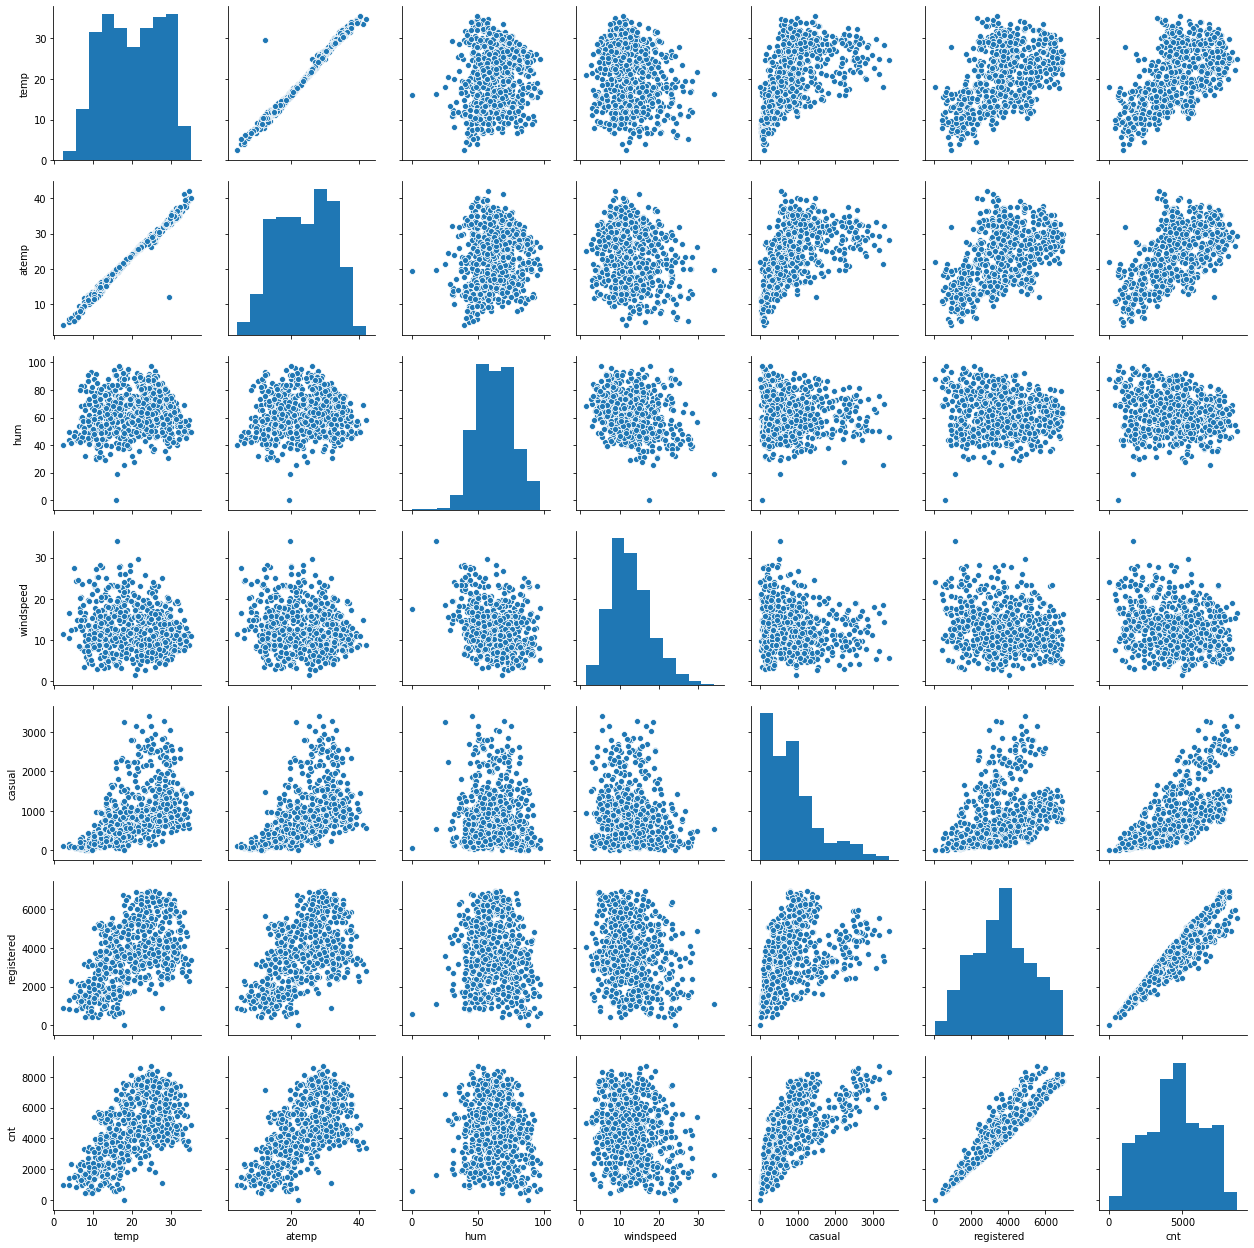

In [6]:
# Pairplot for the numerical variables
sns.pairplot(boombike, vars=['temp','atemp','hum','windspeed','casual','registered','cnt'])
plt.show()

From the above plots, it is certain that most of the numeric variables are directly affecting the target variable "cnt". Let's look into the categorical variables to understand them better. Let's use subplot for this purpose. 

#### Visualising the categorical variables using box plot

Boxplot between target variable and the categorical variables shows if there is any influence between them

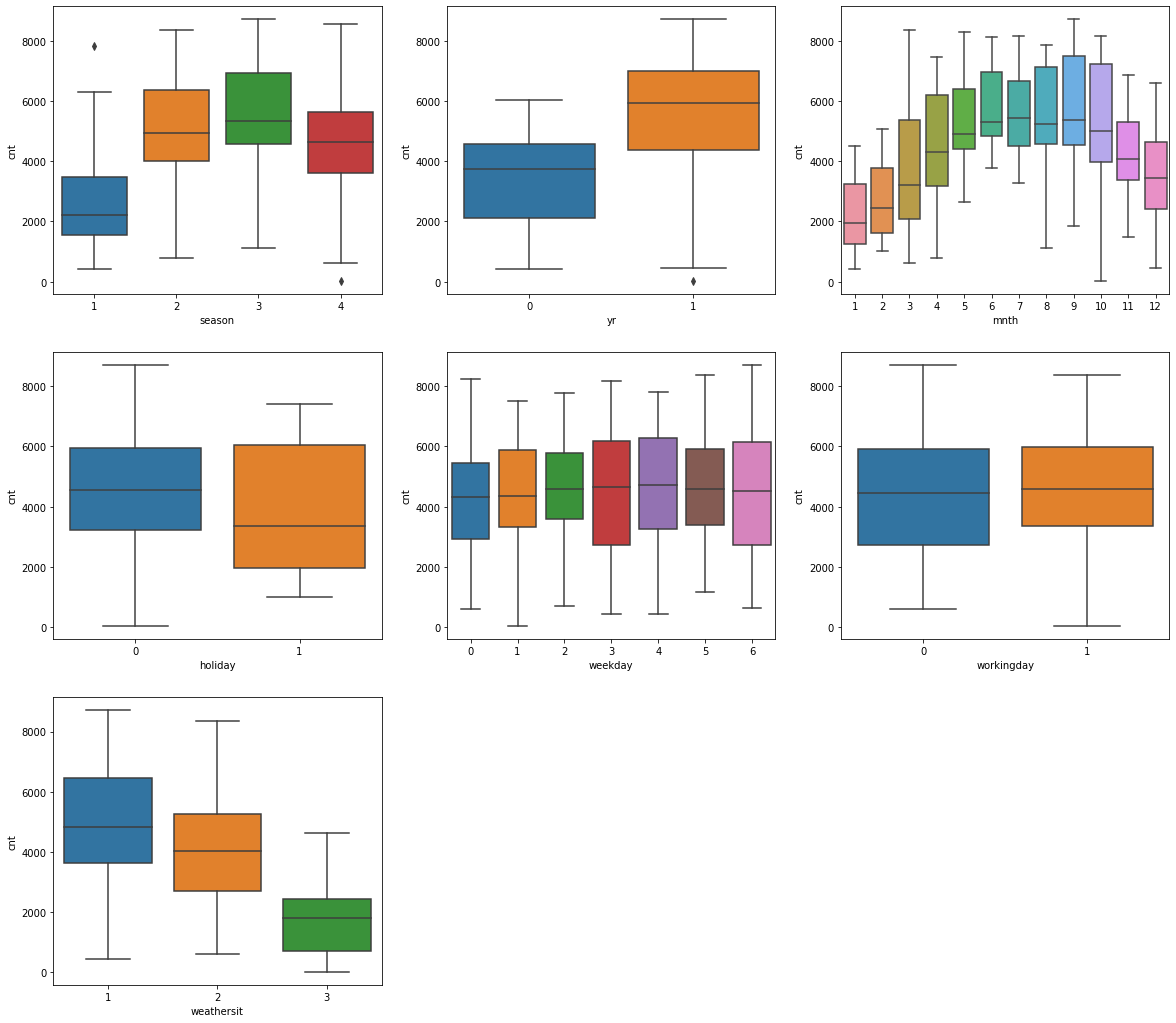

In [7]:
plt.figure(figsize=(20, 18))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = boombike)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = boombike)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = boombike)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = boombike)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = boombike)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = boombike)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = boombike)
plt.show()

It's very much clear from the above plots that there are dependencies on the categorical variables as well. Weather situation, season and month are few of the most influencing in this matter. We'll learn more on the dependencied later in details.

# 3. Preparing the Data

Also, by going through the data dictionary, it is easily understandable that some of the variables are continuous and some are categorical in nature.
The Categorical variables are as below:
- season
- yr
- mnth
- holiday
- weekday
- workingday
- weathersit


And the Continuous variables are as follow:
- temp
- atemp
- hum
- windspeed
- casual
- registered
- cnt

The variable "instant" is index data and does not effect the target variable in any way. Similarly the "dteday" variale has no influence on the terget variable. If we look into the variables "casual", "registered" and "cnt", we see that the summation of "casual" and "registered" equals "cnt". Hence "casual" and "registered" becomes redundant variables and can be neglected while building the model. Hence the above mentioed variables i.e. "instant", "dteday", "casual" and "registered" can be dropped from the dataframe.

#### Droppig the mentioned variables as they are not significant to the analysis

In [8]:
boombike = boombike.drop(["instant", "dteday", "casual", "registered"], axis = 1)
boombike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Treating Categorical Variables

According to the data dictionary, naming the categorical variables to meaningful values

In [9]:
boombike['season'] = boombike.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
boombike['mnth'] = boombike.mnth.map({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dec'})
boombike['weekday'] = boombike.weekday.map({0:'sunday', 1:'monday', 2:'tuesday', 3:'wednesday', 4:'thursday', 5:'friday', 6:'saturday'})
boombike['weathersit'] = boombike.weathersit.map({1:'clear', 2:'cloudy', 3:'light rain', 4:'heavy rain'})

In [10]:
boombike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,saturday,0,cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sunday,0,cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,monday,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tuesday,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wednesday,1,clear,9.305237,11.46350,43.6957,12.522300,1600


Since all the categorical variables that have more than two categories have been named to some understandable values and also are converted to objects, we can now create dummy variables for them.

#### Creating dummy variables for SEASON

In [11]:
#creating dummy variables for season and dropping first column for efficiency
seasons = pd.get_dummies(boombike['season'], drop_first = True)

In [12]:
#concating seasons with the original dataframe
boombike = pd.concat([boombike,seasons], axis=1)

In [13]:
#removing the original season variable from the boombike dataframe
boombike = boombike.drop('season', axis=1)

In [14]:
#inspecting the dataframe to check if the changes were made successfully
boombike.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,0,jan,0,saturday,0,cloudy,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,0,jan,0,sunday,0,cloudy,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,0,jan,0,monday,1,clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,0,jan,0,tuesday,1,clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,0,jan,0,wednesday,1,clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


#### Creating dummy variables for MNTH

In [15]:
#creating dummy variables for mnth and dropping first column for efficiency
months = pd.get_dummies(boombike['mnth'], drop_first = True)

In [16]:
#concating months with the original dataframe
boombike = pd.concat([boombike,months], axis=1)

In [17]:
#removing the original mnth variable from the boombike dataframe
boombike = boombike.drop('mnth', axis=1)

In [18]:
#inspecting the dataframe to check if the changes were made successfully
boombike.head()

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,saturday,0,cloudy,14.110847,18.18125,80.5833,10.749882,985,...,0,0,1,0,0,0,0,0,0,0
1,0,0,sunday,0,cloudy,14.902598,17.68695,69.6087,16.652113,801,...,0,0,1,0,0,0,0,0,0,0
2,0,0,monday,1,clear,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,1,0,0,0,0,0,0,0
3,0,0,tuesday,1,clear,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,1,0,0,0,0,0,0,0
4,0,0,wednesday,1,clear,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,1,0,0,0,0,0,0,0


#### Creating dummy variables for WEEKDAY

In [19]:
#creating dummy variables for weekday and dropping first column for efficiency
weekdays = pd.get_dummies(boombike['weekday'], drop_first = True)

In [20]:
#concating weekdays with the original dataframe
boombike = pd.concat([boombike,weekdays], axis=1)

In [21]:
#removing the original weekday variable from the boombike dataframe
boombike = boombike.drop('weekday', axis=1)

In [22]:
#inspecting the dataframe to check if the changes were made successfully
boombike.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,...,may,nov,oct,sep,monday,saturday,sunday,thursday,tuesday,wednesday
0,0,0,0,cloudy,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,cloudy,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,clear,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,clear,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,clear,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,0,0,0,0,0,0,0,1


#### Creating dummy variables for WEATHERSIT

In [23]:
#creating dummy variables for weathersit and dropping first column for efficiency
weather = pd.get_dummies(boombike['weathersit'], drop_first = True)

In [24]:
#concating weather with the original dataframe
boombike = pd.concat([boombike,weather], axis=1)

In [25]:
#removing the original weathersit variable from the boombike dataframe
boombike = boombike.drop('weathersit', axis=1)

In [26]:
#inspecting the dataframe to check if the changes were made successfully
boombike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,monday,saturday,sunday,thursday,tuesday,wednesday,cloudy,light rain
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


# 4. Splitting the data into test and training sets

In [27]:
# Importing the required libraries
from sklearn.model_selection import train_test_split

# To ensure that the train and test data set always have the same rows
np.random.seed(0)

bk_train, bk_test = train_test_split(boombike, train_size=0.70, random_state=100)

In [28]:
# Checking if the splitting of data worked correctly
print(bk_train.shape)
print(bk_test.shape)

(510, 30)
(220, 30)


Since all the numerical variables are in different scales, we need to rescale the variables into a common scalling. Hence using MinMax Scalling method to scale these variables

In [29]:
# Creating a list of all the numerical variables so that they can be rescalled
num_vars = ['temp','atemp','hum','windspeed','cnt']

In [30]:
# Importing the required libraries
from sklearn.preprocessing import MinMaxScaler

# Creating the scaler object
scaler = MinMaxScaler()

In [31]:
# Applying the Scaler object on the numerical variables of the Training data set
bk_train[num_vars] = scaler.fit_transform(bk_train[num_vars])

In [32]:
# Validating if the scalling worked properly
bk_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,monday,saturday,sunday,thursday,tuesday,wednesday,cloudy,light rain
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,0,0,0,1,0


It's time to check the correlation coefficient of all the variables to check whether or not the variables are correlated with each other

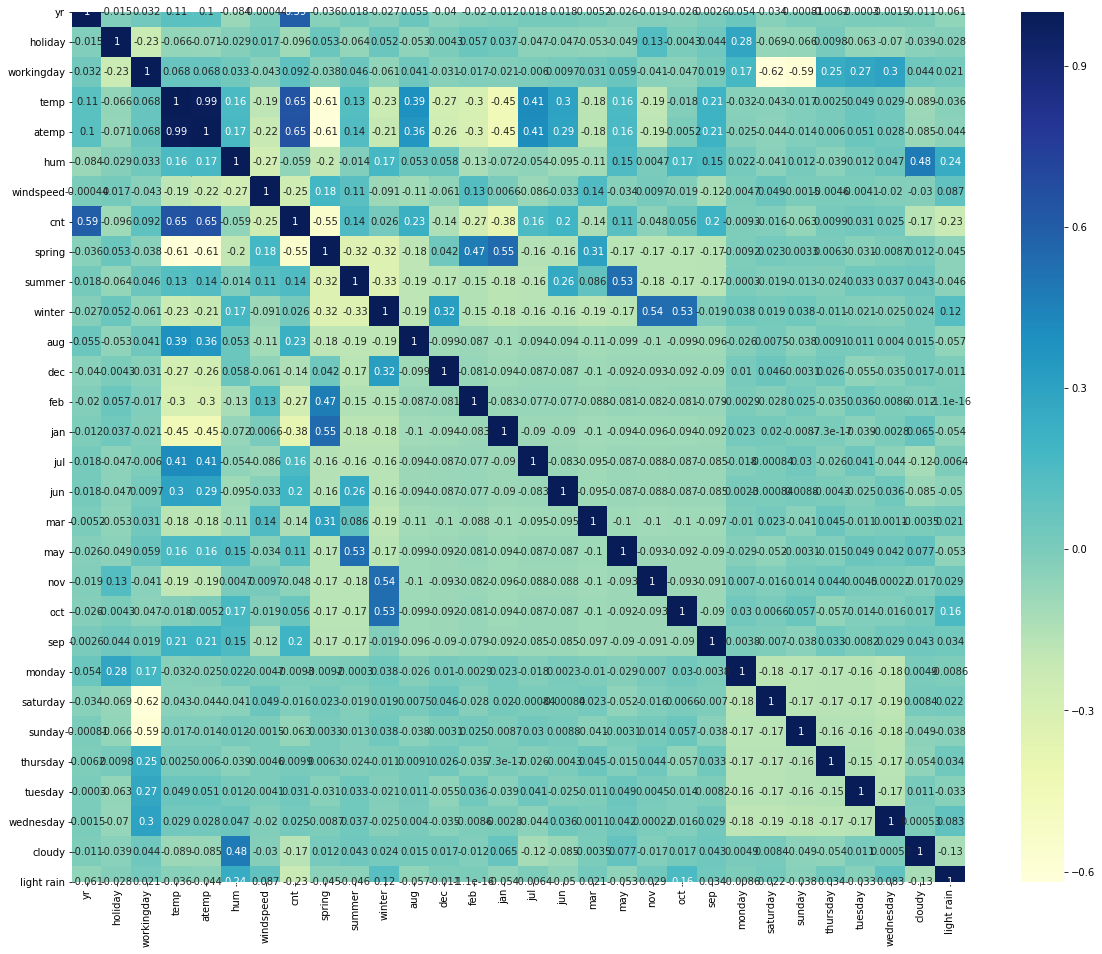

In [33]:
plt.figure(figsize=(20,16))
sns.heatmap(bk_train.corr(), annot=True, cmap='YlGnBu')
plt.show()

From the above heatmap it can be seen that there are a number of variables that are correlated with each other. It's also obvious that temperature(temp) and temperature felt(atemp) should be highly correlated and thus using both the variables would be redundant. Hence we should drop the temp variable. 

In [34]:
# Dropping tempvariable from the training data
bk_train = bk_train.drop('temp', axis=1)

In [35]:
# Inspecting the training set
bk_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,monday,saturday,sunday,thursday,tuesday,wednesday,cloudy,light rain
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,1,0
111,0,0,1,0.318819,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,0,0,0,0,1,0


# 5. Create X and y sets for model building

In [36]:
y_train = bk_train.pop('cnt')
X_train = bk_train

# 6. Building a linear model

We have 29 columns here in the training data. We can create a model using some of the features. To choose the most influencing features, there are a few methods i.e., manually dropping of least helpful features and rebuilding the model and repeat the process, some of the automated methods like top n features (RFE), forward selection, backward selection and so on. 

As we have 29 columns here in our data set, we will use a mixed approach to build the best suitable model. First, we'll apply RFE (Recursive Feature Elimination) method to select the top 12 features. Then we'll follow the backward selection technique to build the best model possible. 

In [37]:
# Importing the required libraries and modules
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [38]:
# Creating a linear regression model using X_train and y_train
lm = LinearRegression()
lm.fit(X_train, y_train)

# Selecting top 12 features using RFE
rfe = RFE(lm, 12)
rfe = rfe.fit(X_train, y_train)

In [39]:
# To check which top 12 features are selected
cols = X_train.columns[rfe.support_]
cols

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'summer', 'winter', 'aug',
       'sep', 'saturday', 'cloudy', 'light rain'],
      dtype='object')

#### Building a model using the top 12 features

In [40]:
X_train_rfe = X_train[cols]

In [41]:
# Adding a constant to X_train_rfe
import statsmodels.api as sm

X_train_lm = sm.add_constant(X_train_rfe)

In [42]:
# Creating the linear model
lm = sm.OLS(y_train, X_train_lm).fit()

In [43]:
# Checking the summerry of the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          8.77e-187
Time:                        22:23:20   Log-Likelihood:                 501.06
No. Observations:                 510   AIC:                            -976.1
Df Residuals:                     497   BIC:                            -921.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2264      0.028      8.230      0.0

From the model and summary above, we can see that the variable saturday is not so significant. So we can drop this variable. But before doing so, we should check in multicollinearity between these variables. So, let's do that.

In [44]:
# Importing the required modules
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [45]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,14.74
2,atemp,9.73
4,windspeed,3.62
10,cloudy,2.13
0,yr,2.01
5,summer,1.84
6,winter,1.74
7,aug,1.55
8,sep,1.30
9,saturday,1.19


By looking into the statistics and the VIF value, we see that the variable "saturday" has low statistical significance (p-value > 0.05) but has VIF under control (VIF < 2.0). However, even if the statistical significance are high, the variables "hum" and "atemp" as much higher (14.74 and 9.73 respectively). We drop the variable "saturday" and rebuild the model.

In [46]:
# Dropping the variable "saturday" and rebuilding the model
X_train_rfe = X_train_rfe.drop('saturday', axis=1)

X_train_lm = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train, X_train_lm).fit()

In [47]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.9
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          1.49e-187
Time:                        22:23:20   Log-Likelihood:                 500.06
No. Observations:                 510   AIC:                            -976.1
Df Residuals:                     498   BIC:                            -925.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2306      0.027      8.423      0.0

Now, we can see that all the variables are now statistically significant. Let's check the VIF for each variable now.

In [48]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,14.69
2,atemp,9.73
4,windspeed,3.58
9,cloudy,2.13
0,yr,2.01
5,summer,1.84
6,winter,1.74
7,aug,1.55
8,sep,1.30
10,light rain,1.16


Now, since "holiday" is statistically insignificant, lets drop it and rebuild the model

In [49]:
# Dropping the variable "holiday" and rebuilding the model
X_train_rfe = X_train_rfe.drop('holiday', axis=1)

X_train_lm = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train, X_train_lm).fit()

In [50]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.1
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          4.24e-186
Time:                        22:23:21   Log-Likelihood:                 493.75
No. Observations:                 510   AIC:                            -965.5
Df Residuals:                     499   BIC:                            -918.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2267      0.028      8.194      0.0

Now, all the columns are statistically significant. Let's check the VIF.

In [51]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,14.61
1,atemp,9.71
3,windspeed,3.57
8,cloudy,2.12
0,yr,2.01
4,summer,1.83
5,winter,1.74
6,aug,1.55
7,sep,1.30
9,light rain,1.16


Since, the VIF for "hum" is very high as 14.61, droppig "hum" variable and rebuilding the model

In [52]:
# Dropping the variable "hum" and rebuilding the model
X_train_rfe = X_train_rfe.drop('hum', axis=1)

X_train_lm = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train, X_train_lm).fit()

In [53]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     260.8
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          1.58e-182
Time:                        22:23:21   Log-Likelihood:                 482.44
No. Observations:                 510   AIC:                            -944.9
Df Residuals:                     500   BIC:                            -902.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1226      0.017      7.087      0.0

All the variables are still significant. Checking the VIF again for the remaining variables.

In [54]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,atemp,4.92
2,windspeed,3.02
0,yr,2.00
3,summer,1.83
5,aug,1.54
4,winter,1.50
7,cloudy,1.49
6,sep,1.30
8,light rain,1.08


So, now all the variables are statidtically significant since the p-value for all the variables are below 0.05 and also they are not collinear to each other since the VIF for each is less than 5. 
The R-squared value is 82.4% and the adjusted R-sqyuared is 82.1%. Since both of them are high, it means almost 82% of data are fitting the model. Overall, it seems a good model with a few number of variables (9 in this model).

In [55]:
# Making a list of variables of the final model
train_columns = X_train_rfe.columns
train_columns

Index(['yr', 'atemp', 'windspeed', 'summer', 'winter', 'aug', 'sep', 'cloudy',
       'light rain'],
      dtype='object')

## Checking the assumptions of linear regression for the model

### Residual Analysis of the Train set

In [56]:
# Predicting the y_train using the above built model
y_train_pred = lm.predict(X_train_lm)

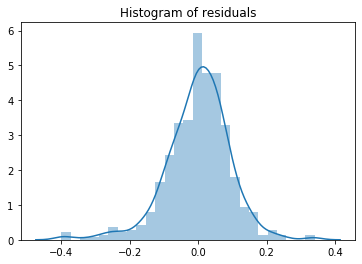

In [57]:
# Plotting a histogram to check if the residuals are normally distributed or not
res = y_train - y_train_pred

sns.distplot(res)
plt.title("Histogram of residuals")
plt.show()

From the plot above, we can conclude that the residuals' distribution for the train set holds true to be normally distributed

# 7. Evaluating the test set

In [58]:
bk_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,monday,saturday,sunday,thursday,tuesday,wednesday,cloudy,light rain
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,1,0,0,0,0,1,0,0,1,0
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,29.315000,32.19710,30.5000,19.583229,4968,0,1,...,0,0,0,0,0,1,0,0,0,0


In [59]:
# Applying the Scaler object on the numerical variables of the Test data set
bk_test[num_vars] = scaler.transform(bk_test[num_vars])
bk_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,monday,saturday,sunday,thursday,tuesday,wednesday,cloudy,light rain
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,0,1,0,0,0,0


In [60]:
bk_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,monday,saturday,sunday,thursday,tuesday,wednesday,cloudy,light rain
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,...,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.318182,0.027273
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,...,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.466833,0.163248
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Splitting the test set into X and y

In [61]:
y_test = bk_test.pop('cnt')
X_test = bk_test

We have alraedy created a list of features from our train model. We select the same set of columns for the test set as well. 

In [62]:
X_test_rfe = X_test[train_columns]

In [63]:
# Adding a constant to the X_train_rfe set
X_test_lm = sm.add_constant(X_test_rfe)

### Making prediction with the final model

In [64]:
# Prediction of y_test_pred using the final model
y_test_pred = lm.predict(X_test_lm)

## Model evaluation on the test set

#### Evaluating the R-squared value for the test set

In [65]:
# Importing the required library/module
from sklearn.metrics import r2_score

#### R-squared value

In [66]:
# R-squared value of model for test set
r2 = r2_score(y_true=y_test, y_pred=y_test_pred)
r2

0.7923257919867839

#### Let's now plot the scatter plot between the actual y and the predicted y to check the spread

Text(0, 0.5, 'y_test_pred')

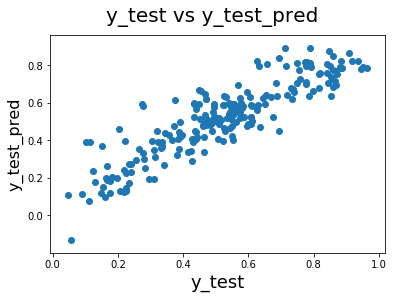

In [67]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_test_pred', fontsize = 16)

#### So, we see that the r-squared value of the model for the training data is 82.4% and the adjusted r-squared for the same is 81.2%. Again the r-squared value of the model for the test data is 79.2%. These values of r-squares are almost similar and hence we can conclude that the model is a quite decent model that explains the target variable.

The equation of the final model is as below:

### cnt = 0.1226 + (0.2337 * yr) + (0.5412 * atemp) - (0.1334 * windspeed) + (0.1005 * summer) + (0.1302 * winter) + (0.0694 * aug) + (0.1180 * sep) - (0.0807 * cloudy) - (0.2718 * light rain)

So, from the above equation of the model we can see that the variables that are mostly affecting the demand are as below:
- year
- feeling temperature
- wind speed
- season
- month
- weather condition

By looking into the coefficients of the variables from the equation of the model, we can conclude that 
- The bike hiring count increased considerably in the year 2019 than 2018 which means, evry year the count can go higher
- With the increasing feeling temperatire, the hire count increases
- When the wind speed is higher, the hire count goes down
- In the seasons Summer and Winter the hiring count goes up
- In August and Spetember also the count goes up
- The count goes down when the weather condition is either (Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist) or (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds)
